## _CORRELATION OF RESERVOIR BUBBLE POINT PRESSURE USING A WHITE-BOX MACHINE LEARNING APPROACH -- BY IKPABI PRINCE BENARD_   

### _The novelty of this work stems from the fact that:_
1. It utilizes the computational power of a machine learning algorithm,  
2. And a simple white box model:
3. To develop an empirical formula that performs better than existing Bubble Point Pressure correlations on all classes of oil API crude.

**Importing the necessary libraries**

In [90]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

**_Reading the PVT data_**  

**_The data was gotten from fields across Niger Delta region_**

In [91]:
data = pd.read_excel('C:/Users/User/Bubble_Point_Project/Project.xlsx')

## EDA and Preprocessing

In [92]:
data.head()

,Pressure,PB,RSI,Gas,Temp,SG,Oil
0,psi,psi,scf/bbl,SG,deg.F,Oil,API
1,3287,3285,377,0.65,154,0.84,36.9524
2,3421,3415,401,0.65,159,0.83,38.9819
3,3515,3515,407,0.59,161,0.83,38.9819
4,3513,3491,474,0.65,161,0.82,41.061


In [93]:
data = data.iloc[1:, :]
data.head()

,Pressure,PB,RSI,Gas,Temp,SG,Oil
1,3287,3285,377,0.65,154,0.84,36.9524
2,3421,3415,401,0.65,159,0.83,38.9819
3,3515,3515,407,0.59,161,0.83,38.9819
4,3513,3491,474,0.65,161,0.82,41.061
5,3536,3516,540,0.65,163,0.81,43.1914


*__Practical data do not come very clean, hence the need to carry out some preprocessing and wrangling__*

In [94]:
data.columns

Index([' Pressure', ' PB', ' RSI', ' Gas', ' Temp', ' SG', 'Oil'], dtype='object')

**_Removing the features not needed_**

In [95]:
df = data.drop(" Pressure", axis=1)

In [96]:
df.head()

,PB,RSI,Gas,Temp,SG,Oil
1,3285,377,0.65,154,0.84,36.9524
2,3415,401,0.65,159,0.83,38.9819
3,3515,407,0.59,161,0.83,38.9819
4,3491,474,0.65,161,0.82,41.061
5,3516,540,0.65,163,0.81,43.1914


**_Renaming the columns to remove the space in the name._**

In [97]:
df.rename(columns={' PB':'PB', ' RSI':'RSI', ' Gas':'SG_Gas', ' Temp':'F_Temp', ' SG':'SG_Oil', 'Oil':'API_Oil'}, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 1 to 532
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PB       532 non-null    object
 1   RSI      532 non-null    object
 2   SG_Gas   532 non-null    object
 3   F_Temp   532 non-null    object
 4   SG_Oil   532 non-null    object
 5   API_Oil  532 non-null    object
dtypes: object(6)
memory usage: 25.1+ KB


**_Putting them in the right data type_**

In [99]:
df['PB'] = df['PB'].astype(float)
df['RSI'] = df['RSI'].astype(float)
df['SG_Gas'] = df['SG_Gas'].astype(float)
df['F_Temp'] = df['F_Temp'].astype(float)
df['SG_Oil'] = df['SG_Oil'].astype(float)
df['API_Oil'] = df['API_Oil'].astype(float)

In [100]:
df.describe()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3245.857143,726.234962,0.644568,167.103383,0.730508,69.029094
std,870.404035,535.309045,0.044506,27.927041,0.119201,46.021145
min,659.000000,14.000000,0.330000,69.000000,0.200000,3.261905
25%,2800.000000,340.000000,0.650000,147.000000,0.650000,38.981928
50%,3243.000000,555.500000,0.650000,162.000000,0.740000,59.716216
75%,3739.500000,991.250000,0.650000,181.000000,0.830000,86.192308
max,5973.000000,4156.000000,0.900000,275.000000,1.050000,576.000000


**_From the description of the data, we can noticeably detect outliers in the Oil_API Gravity_**  
**_To deal with this while trying to avoid error in our analysis, we remove data points with these outliers_**

In [101]:
df = df[(df['API_Oil']>10) & (df['API_Oil']<=70)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PB,314.0,2852.226115,722.324582,659.000000,2325.500000,3050.000000,3383.750000,4448.000000
RSI,314.0,430.359873,217.898783,14.000000,283.250000,399.000000,544.750000,1799.000000
SG_Gas,314.0,0.638599,0.035071,0.520000,0.630000,0.650000,0.650000,0.900000
F_Temp,314.0,153.318471,14.598367,110.000000,144.000000,153.000000,162.000000,224.000000
SG_Oil,314.0,0.809395,0.060138,0.710000,0.760000,0.810000,0.860000,0.950000
API_Oil,314.0,44.284722,13.028884,17.447368,33.034884,43.191358,54.684211,67.795775


**_We make a pair plot to get a feel of the data distribution_**

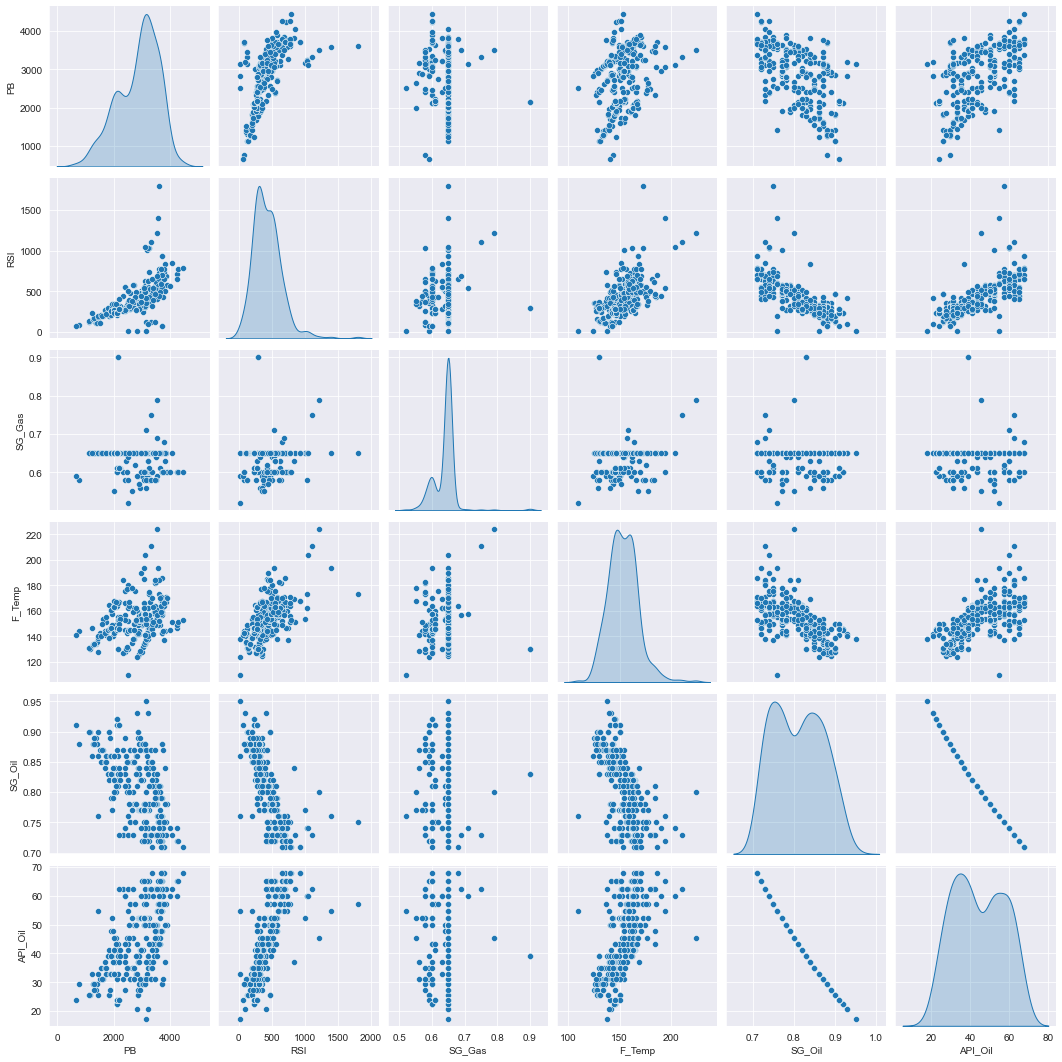

In [102]:
sns.pairplot(data=df, diag_kind='kde')

**_The plot above reveals a highly positive correlation between the Solution GOR and the Reservoir Bubble Point Pressure_**   
**_It also reveals that the Gas specific gravity is the least correlated feature to the Solution GOR_**  
**_With this insight, we could work out feature engineering involving the Solution GOR and the SG_gas_**

### Data Split
*__Before moving on with our analysis, we split the data into train and test sets to avoid data leakage and false patterns__*

In [103]:
y = df['PB']
X = df.copy()

df1, df2, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100) # df1--train, df2--test

In [104]:
print(100*df1.shape[0]/df.shape[0])
print(100*df2.shape[0]/df.shape[0])

69.7452229299363
30.254777070063696


### Oil API Gravity Classes
**_Given the wide range of oil API gravity contained in the data, we further split it into four classes_**

In [105]:
extra_light_train = df1[df1['API_Oil']>45]
extra_light_test = df2[df2['API_Oil']>45]
print(extra_light_train.shape)
print(extra_light_test.shape)

(97, 6)
(52, 6)


In [106]:
light_crude_train = df1[(df1['API_Oil']>31.1) & (df1['API_Oil']<=45)]
light_crude_test = df2[(df2['API_Oil']>31.1) & (df2['API_Oil']<=45)]
print(light_crude_train.shape)
print(light_crude_test.shape)

(81, 6)
(31, 6)


In [107]:
medium_crude_train = df1[(df1['API_Oil']>22.3) & (df1['API_Oil']<=31.1)]
medium_crude_test = df2[(df2['API_Oil']>22.3) & (df2['API_Oil']<=31.1)]
print(medium_crude_train.shape)
print(medium_crude_test.shape)

(39, 6)
(11, 6)


In [108]:
heavy_ex_crude_train = df1[(df1['API_Oil']<=22.3)]
heavy_ex_crude_test = df2[(df2['API_Oil']<=22.3)]
print(heavy_ex_crude_train.shape)
print(heavy_ex_crude_test.shape)

(2, 6)
(1, 6)


In [109]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PB,219.0,2829.118721,714.823539,659.000000,2169.000000,3028.000000,3312.500000,4448.000000
RSI,219.0,425.374429,228.339311,14.000000,282.000000,378.000000,539.500000,1799.000000
SG_Gas,219.0,0.640046,0.036855,0.550000,0.635000,0.650000,0.650000,0.900000
F_Temp,219.0,152.735160,13.941332,124.000000,143.000000,152.000000,162.000000,211.000000
SG_Oil,219.0,0.812785,0.060160,0.710000,0.760000,0.820000,0.860000,0.950000
API_Oil,219.0,43.546220,12.971678,17.447368,33.034884,41.060976,54.684211,67.795775


### Feature Engineering   

*__From the foreground of the descriptive statistical distribution of the data,__*  
*__We express the Solution GOR and the SG_Gas as ratios and see how it compares to the individual features singly.__*

In [110]:
df3 = df1.copy()
df3['Rs_SG_Gas'] = df3['RSI']/ df3['SG_Gas']  #Rs_SG_Gas -- New Feature creeated

In [111]:
corr_matrix =df3.corr()
corr_matrix['PB'].sort_values(ascending=False)

PB           1.000000
Rs_SG_Gas    0.665741
RSI          0.660614
API_Oil      0.581749
F_Temp       0.389460
SG_Gas      -0.045671
SG_Oil      -0.578141
Name: PB, dtype: float64

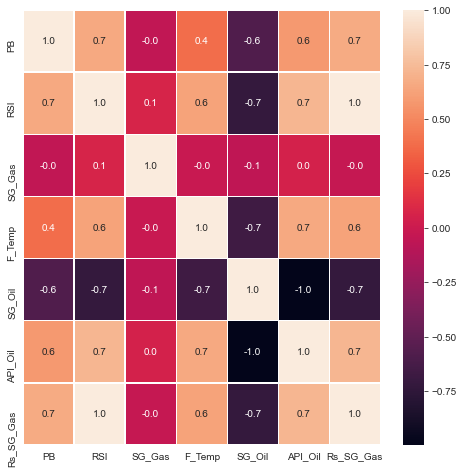

In [112]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df3.corr(method='pearson'),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

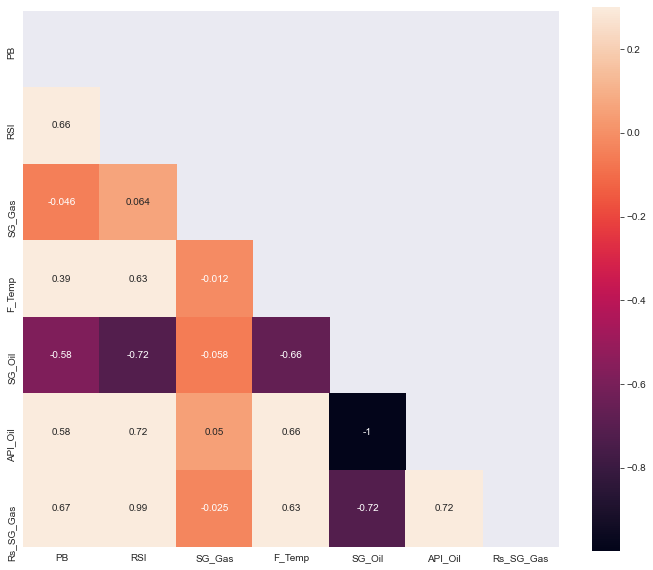

In [113]:
mask = np.zeros_like(df3.corr(method = 'pearson') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(df3.corr(method = 'pearson') ,annot=True,  mask=mask, vmax=.3, square=True)

plt.show()

*__Pearson's correlation plot showing a strong positive correlation between Solution GOR and Bubble Point Pressure__*

In [114]:
df3.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,Rs_SG_Gas
245,659.0,74.0,0.59,141.0,0.91,23.994505,125.423729
474,1816.0,197.0,0.65,139.0,0.90,25.722222,303.076923
299,3204.0,555.0,0.63,162.0,0.74,59.716216,880.952381
131,3063.0,455.0,0.65,166.0,0.78,49.910256,700.000000
62,3015.0,245.0,0.65,132.0,0.88,29.295455,376.923077


*__Creating functions for the statistical metrics to be employed in this research__*

In [115]:
def mape(y_true, y_pred):
    """
    This function calculates the percent mean absolute relative error
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

def mpe(y_true, y_pred):
    """
    This function calculates the percent mean relative error
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(((y_true - y_pred) / y_true) * 100)



### Steps taken to develop the empirical formula:   
**_1. Express the BPP as a function of RS_SG_Gas, Oil_API Gravity, and Reservoir Temperature in Fahrenheit_**   
**_2. Log-linearize the function to give a multiple non linear regression_**   
**_3. Find the best constant and coefficients that reduces the error term to null_**   

_This work chooses to utilize a white box machine learning algorithm in finding the best constant and coefficients_

In [116]:
Pb_train = df3['PB']
Rs_SG_Gas = df3['Rs_SG_Gas']
F_Temp = df3['F_Temp']
API_Oil = df3['API_Oil']

In [117]:
modell = df3.copy()

In [118]:
modell.drop(['RSI', 'SG_Gas', 'SG_Oil'], axis=1, inplace = True)

In [119]:
modell.head()

,PB,F_Temp,API_Oil,Rs_SG_Gas
245,659.0,141.0,23.994505,125.423729
474,1816.0,139.0,25.722222,303.076923
299,3204.0,162.0,59.716216,880.952381
131,3063.0,166.0,49.910256,700.000000
62,3015.0,132.0,29.295455,376.923077


*__Converting to log form to express as a linear function__*

Log P = Log a + b(Log F_Temp) + c(Log API_Oil) + d(Log Rs_SG_Gas)

Y = Bo + B1X1 + B2X2 + B3X3

In [120]:
modell.drop('PB', axis=1, inplace=True)

In [121]:

modell['Rs_SG_Gas'] = np.log10(modell['Rs_SG_Gas'])
modell['F_Temp'] = np.log10(modell['F_Temp'])
modell['API_Oil'] = np.log10(modell['API_Oil'])


### Machine Learning Modeling

In [122]:
dt_reg = DecisionTreeRegressor(max_features='auto', 
                             min_samples_split=8, min_weight_fraction_leaf=0.0,
                             random_state=12, criterion='mse')

lr_reg = LinearRegression()

rg_reg = Ridge(alpha=1.0)

las_reg = Lasso(alpha=1.0)

In [123]:


reg = {
    "LinearRegression": lr_reg,
    "Ridge": rg_reg,
    "Lasso": las_reg,
    'decisiontree': dt_reg,
    }

**Creating a validation set to evaluate the performance of the white box models**

In [124]:
X_train, X_val, y_tr, y_vl = train_test_split(modell, np.log10(y_train), test_size=0.15, random_state=100) 

In [125]:
3300/314

10.509554140127388

In [126]:
print(100*X_train.shape[0])
print(100* X_val.shape[0])

18600
3300


In [127]:
%%time
dic_train_rmse =  {"Model":[],"RMSE_Train":[]}
dic_val_rmse =  {"Model":[],"RMSE_Val":[]}
dic_train_mae =  {"Model":[],"MAE_Train":[]}
dic_val_mae =  {"Model":[],"MAE_Val":[]}
for name, model in reg.items():
    
    model.fit(X_train, y_tr)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    rmse_train  = np.sqrt(mean_squared_error(y_tr, y_train_pred))
    rmse_val  = np.sqrt(mean_squared_error(y_vl, y_val_pred))
    mae_train = mape(y_tr, y_train_pred)
    mae_val = mape(y_vl, y_val_pred)
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("\n-----Training Data Evalution-----")
    
    print("RMSE_TRAIN: ",np.sqrt(mean_squared_error(y_tr, y_train_pred)))
    print("\nMAE_TRAIN: ", mape(y_tr, y_train_pred))
    print("\nRMSE_VAL: ",np.sqrt(mean_squared_error(y_vl, y_val_pred)))
    print("\nMAE_VAL: ", mape(y_vl, y_val_pred))
   
    dic_train_rmse["Model"].append(name)
    dic_val_rmse["Model"].append(name)
    dic_train_mae["Model"].append(name)
    dic_val_mae["Model"].append(name)
    dic_train_rmse["RMSE_Train"].append(rmse_train)
    dic_val_rmse["RMSE_Val"].append(rmse_val)
    dic_train_mae["MAE_Train"].append(mae_train)
    dic_val_mae["MAE_Val"].append(mae_val)
final_data_T_rmse = pd.DataFrame(dic_train_rmse)
final_data_V_rmse = pd.DataFrame(dic_val_rmse)
final_data_T_mae = pd.DataFrame(dic_train_mae)
final_data_V_mae = pd.DataFrame(dic_val_mae)
print("==================================================================")
print("==================================================================")
print("==================================================================")
print(final_data_T_rmse.sort_values("RMSE_Train", axis = 0, ascending = True))
print(final_data_V_rmse.sort_values("RMSE_Val", axis = 0, ascending = True))
print(final_data_T_mae.sort_values("MAE_Train", axis = 0, ascending = True))
print(final_data_V_mae.sort_values("MAE_Val", axis = 0, ascending = True))

--------------------------------------------------------------
Model: LinearRegression

-----Training Data Evalution-----
RMSE_TRAIN:  0.10125203114083375

MAE_TRAIN:  1.9950186067415345

RMSE_VAL:  0.099293151400235

MAE_VAL:  2.1511047166938124
--------------------------------------------------------------
Model: Ridge

-----Training Data Evalution-----
RMSE_TRAIN:  0.10183206753958028

MAE_TRAIN:  2.07493630633848

RMSE_VAL:  0.09796484006233076

MAE_VAL:  2.210207727285445
--------------------------------------------------------------
Model: Lasso

-----Training Data Evalution-----
RMSE_TRAIN:  0.1331973225145649

MAE_TRAIN:  3.120885030313062

RMSE_VAL:  0.1249159969396471

MAE_VAL:  2.9776088592819248
--------------------------------------------------------------
Model: decisiontree

-----Training Data Evalution-----
RMSE_TRAIN:  0.030737030349743

MAE_TRAIN:  0.5802637497244537

RMSE_VAL:  0.14323615667616493

MAE_VAL:  1.7342592431296644
              Model  RMSE_Train
3      d

*__Linear Regression performed quite better compared to other models__*  

_Obtaining the weights and bias term from the model:_

In [128]:
lr_reg.fit(X_train, y_tr)
lr_reg.intercept_, lr_reg.coef_

(3.039288152278094, array([-0.32761462,  0.24433212,  0.25715277]))

In [129]:
a = 10**3.039288152278094
a

1094.682441851717

### The optimized Values:

In [130]:
modell.head()

,F_Temp,API_Oil,Rs_SG_Gas
245,2.149219,1.380112,2.098380
474,2.143015,1.410308,2.481553
299,2.209515,1.776092,2.944952
131,2.220108,1.698190,2.845098
62,2.120574,1.466800,2.576253


### The Correlation Developed :

In [131]:
pred_p = a*(F_Temp**-0.32761462)*(API_Oil**0.24433212)*(Rs_SG_Gas**0.25715277)

### Analysing the metric error using the initial data and the optimized values of constant and coefficients:

In [132]:


#We find the rmse and mae by comparing the target value gotten

print("The rmse value is: ", np.sqrt(mean_squared_error(y_train, pred_p)))
print("\nThe percent mean absolute  error is: ", mape(y_train, pred_p))
print("\nThe percent mean error is: ", mpe(y_train, pred_p))


The rmse value is:  514.7730117575476

The percent mean absolute  error is:  16.097002425921524

The percent mean error is:  -1.6485403833817749


The model performs quite well

### Comparing the performance with existing correlations

In [133]:
def Standing_Corr(data):
    """
    This function simulates bubble point pressure using Standing correlation
    """
    T_factor = (0.00091*data['F_Temp'])-(0.0125*data['API_Oil'])
    A = (10**T_factor)* (data['RSI']/data['SG_Gas'])**0.83
    data['PB_Standing'] = 18.2*(A-1.4)
    return data

def Lasater_Corr(data):
    """
    This function simulates bubble point pressure using Lasater correlation
    """
    Mo = (26.297 - (0.2706*data['API_Oil']))**2
    ygu = data['RSI']/379.3
    y = ygu/(ygu + (350*data['SG_Oil']/Mo))
    yg1 = 2.273*y
    yg2 = 7.522*y**3
    Pf = 0.046 + yg1 + yg2
    T_factor = (data['F_Temp'] + 459.67)/data['SG_Gas']
    data['PB_Lasater'] = Pf*T_factor
    return data

def Glaso_Corr(data):
    """
    This function simulates bubble point pressure using Glaso correlation
    """
    T_factor = (data['F_Temp']**0.172)/(data['API_Oil']**0.989)
    R_factor = (data['RSI']/data['SG_Gas'])**0.816
    A = R_factor * T_factor
    x = 1.7447*np.log10(A)
    y = -0.30218*(np.log10(A))**2
    data['PB_Glaso'] = 10**(1.7669+x+y)
    return data
def Al_Marhoun_Corr(data):
    """
    This function simulates bubble point pressure using Al-Marhoun correlation
    """
    Rs_factor = 0.00538088*(data['RSI']**0.715082)
    T_factor = (data['SG_Gas']**-1.87784)*(data['SG_Oil']**3.1437)*((460+data['F_Temp'])**1.32657)
    data['PB_Al-Marhoun'] = Rs_factor * T_factor
    return data

def Petrosky_Farshad_Corr(data):
    """
    This function simulates bubble point pressure using Petrosky_Farshad correlation
    """
    API_factor = 0.0007916*(data['API_Oil']**1.541)
    T_factor = 0.00004561*(data['F_Temp']**1.3911)
    x = API_factor - T_factor
    Rsb_Factor = (data['RSI']**0.5774)/((data['SG_Gas']**0.8439)*10**x)
    data['PB_Petrosky'] = 112.727*(Rsb_Factor - 12.34)
    return data

def Jonathan_Joseph_Corr(data):
    """
    This function simulates bubble point pressure using Jonathan and Joseph correlation
    """
    Sg_factor = (np.mean(data['SG_Gas'])**1.066621)*(data['SG_Oil']**2.313833)
    T_factor = (data['RSI']**0.070147)*(data['F_Temp']**0.682024)
    data['PB_Jonathan'] = 67.3506*(Sg_factor*T_factor)
    return data

def Ikiensikimama_Ogboja_Corr(data, x1=336.0064009, x2=6.7063984,
                       x3=47.57094772, x4=0.677706662,
                       x5=1.530935619, x6=0.243181338,
                       x7=-2.316548789, x8=10.60657909,
                       x9=1.518030465, x10=635.4152349
                      ):
    S = (x3-(x4*data['API_Oil']))**x5
    Qr = (data['RSI']/x1)/((data['RSI']/x1)+(x2*data['SG_Oil']/S))
    Pbr = x6+(x7*Qr)+(x8*(Qr**x9))
    data['PB_Ikiensikimama_Ogboja'] = (Pbr*(data['F_Temp']+x10))/data['SG_Gas']
    return data

def Okoduwa_Ikien_heavy_Corr(data, a1=4.58925593,
                            a2=0.92334377, a3=-2.5394869,
                            a4=5.68277772, a5=0.01059824):
    pb = a1*(data['RSI']**a2)*(data['SG_Gas']**a3)*(data['SG_Oil']**a4)\
    *(data['F_Temp']**a5)
    data['PB_Okoduwa_Ikien_heavy'] = pb
    return data

def Okoduwa_Ikien_medium_Corr(data, a1=10.6356181,
                            a2=1.01965369, a3=-0.32111265,
                            a4=6.86132951, a5=0.00182483):
    pb = a1*(data['RSI']**a2)*(data['SG_Gas']**a3)*(data['SG_Oil']**a4)\
    *(data['F_Temp']**a5)
    data['PB_Okoduwa_Ikien_medium'] = pb
    return data

def Okoduwa_Ikien_blend_Corr(data, a1=0.00007735,
                            a2=0.95071520, a3=-1.61775550,
                            a4=1.81805246, a5=1.72440768):
    pb = a1*(data['RSI']**a2)*(data['SG_Gas']**a3)*(data['SG_Oil']**a4)\
    *(data['F_Temp']**a5)
    data['PB_Okoduwa_Ikien_blend'] = pb
    return data

def Okoduwa_Ikien_light_Corr(data, x1=336.0064009, x2=6.7063984,
                       x3=47.57094772, x4=0.677706662,
                       x5=1.530935619, x6=0.243181338,
                       x7=-2.316548789, x8=10.60657909,
                       x9=1.518030465, x10=635.4152349
                      ):
    S = (x3-(x4*data['API_Oil']))**x5
    Qr = (data['RSI']/x1)/((data['RSI']/x1)+(x2*data['SG_Oil']/S))
    Pbr = x6+(x7*Qr)+(x8*(Qr**x9))
    data['PB_Okoduwa_Ikien_light'] = (Pbr*(data['F_Temp']+x10))/data['SG_Gas']
    return data

def Okoduwa_Ikien_extra_light_Corr(data, a1=0.12357834,
                            a2=0.69387390, a3=-1.56602923,
                            a4=9.49138112, a5=1.07875303):
    pb = a1*(data['RSI']**a2)*(data['SG_Gas']**a3)*(data['SG_Oil']**a4)\
    *(data['F_Temp']**a5)
    data['PB_Okoduwa_Ikien_extra_light'] = pb
    return data

def Oloruntoba_Onyekonwu_Corr(data, a1=10**1.45274,
                            a2=0.71363, a3=-1.89527,
                            a4=-0.58612, a5=0.30388):
    pb = a1*(data['RSI']**a2)*(data['SG_Gas']**a3)*(data['API_Oil']**a4)\
    *(data['F_Temp']**a5)
    data['PB_Oloruntoba_Onyekonwu'] = pb
    return data


def Prince_Corr(data, a1=1094.682441851717,
               a2=-0.32761462,  a3=0.24433212, 
                a4=0.25715277):
    RSI_SG = data['RSI']/data['SG_Gas']
    Pr=a1*(data['F_Temp']**a2)*(data['API_Oil']**a3)*(RSI_SG**a4)
    data['PB_Prince'] = Pr
    return data 

The new correlation is named: Prince_Corr or New_Corr

## Comparing the model  

*__On the entire data__*

In [134]:
model_train = df.copy()
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_extra_light_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_extra_light,PB_Oloruntoba_Onyekonwu,PB_Prince
1,3285.0,377.0,0.65,154.0,0.84,36.952381,1680.413289,1810.825983,1993.426528,2427.307078,2089.721370,1312.359371,9687.300339,651.151403,2464.855124,2607.791968
2,3415.0,401.0,0.65,159.0,0.83,38.981928,1686.028400,1834.521788,1999.910449,2469.520506,2090.184245,1310.274458,9733.847602,627.888602,2520.724457,2656.396566
3,3515.0,407.0,0.59,161.0,0.83,38.981928,1860.180404,2056.422188,2211.613909,3006.546172,2427.308224,1322.870296,10761.442895,748.313688,3072.526300,2722.633651
4,3491.0,474.0,0.65,161.0,0.82,41.060976,1834.452274,2034.783985,2197.349246,2690.674415,2289.662103,1300.107599,9805.454604,637.048927,2765.556195,2797.087066
5,3516.0,540.0,0.65,163.0,0.81,43.191358,1931.913525,2168.200577,2337.873374,2853.947933,2409.857126,1286.108164,9846.202899,629.017518,2957.594455,2916.591496


In [136]:
def performance(df):
    """
        RMSE: Root Mean Squared Error
        MARE: Mean Absolute Relative Error (in percentage)
        MRE: Mean Relative Error
        
    """
    
    RMSE = []
    MARE = []
    MRE = []
    for corr in df.columns[6:]:
        print(f"\n_____________{corr}__________")
        measured, estimated = df[df.columns[0]], df[corr]
        rmse_score = np.sqrt(mean_squared_error(measured, estimated))
        mare_score = mape(measured, estimated)
        mpe_score = mpe(measured, estimated)
        print("\nThe rmse value is: ", rmse_score)
        print("\nThe percent mean absolute relative error is: ", mare_score)
        print("\nThe percent mean relative error is: ", mpe_score)
        RMSE.append(rmse_score)
        MARE.append(mare_score)
        MRE.append(mpe_score)
    return RMSE, MARE, MRE

In [137]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  1581.357116838148

The percent mean absolute relative error is:  47.073922962566016

The percent mean relative error is:  46.90540127426164

_____________PB_Lasater__________

The rmse value is:  1548.8392371336734

The percent mean absolute relative error is:  46.04078682183591

The percent mean relative error is:  45.77280340654244

_____________PB_Glaso__________

The rmse value is:  1241.6179860087618

The percent mean absolute relative error is:  35.93346334734013

The percent mean relative error is:  33.639169397199964

_____________PB_Al-Marhoun__________

The rmse value is:  867.3399770805821

The percent mean absolute relative error is:  23.546955630071945

The percent mean relative error is:  16.13988695628598

_____________PB_Petrosky__________

The rmse value is:  1473.5044957607706

The percent mean absolute relative error is:  41.693884638913765

The percent mean relative error is:  39.800007361745514

_____________

In [138]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_extra_light(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

all_data = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
all_data.sort_values(ascending=True, by='MARE')

,RMSE,MARE,MRE
New_Corr,516.562486,16.031168,-1.481981
Jonathan_Joseph(2019),755.241379,20.100192,11.202506
Al_Marhoun(1988),867.339977,23.546956,16.139887
Glaso(1980),1241.617986,35.933463,33.639169
Petrosky_Farshad(1993),1473.504496,41.693885,39.800007
Lasater(1958),1548.839237,46.040787,45.772803
Standing(1947),1581.357117,47.073923,46.905401
Ikiensikimama_Ogboja(2009),1834.130444,54.621542,53.266745
Oloruntoba_Onyekonwu(2016),2480.741596,80.067923,80.067923
Okoduwa_Ikiensikimama_extra_light(2010),6415.638172,250.166323,-249.379482


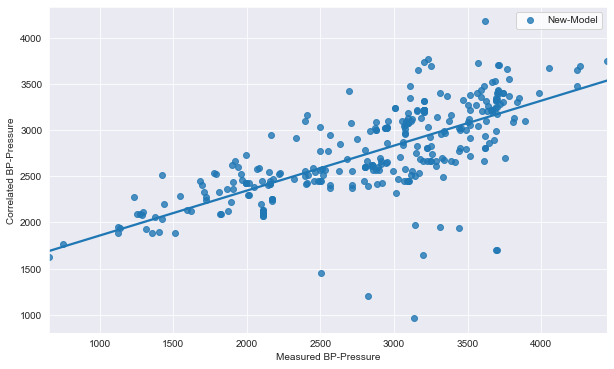

In [139]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid',{'axes.axisbelow':False})

#sns.regplot(x='PB', y = 'PB_Standing', data=model_train, ci=None, ax=ax, label='Standing')
#sns.regplot(x='PB', y = 'PB', data=model_train, ci=None, ax=ax, label='Actual')
#sns.regplot(x='PB', y = 'PB_Glaso', data=model_train, ci=None, ax=ax, label='Glaso')
sns.regplot(x='PB', y='PB_Prince', data=model_train, fit_reg=True, ci=None, ax=ax, label='New-Model')
#sns.regplot(x='PB', y = 'PB_Al-Marhoun', data=model_train, ci=None, ax=ax, label='Al-Marhoun')
#sns.regplot(x='PB', y = 'PB_Petrosky', data=model_train, ci=None, ax=ax, label='Petrosky_Farshad')
#sns.regplot(x='PB', y = 'PB_Jonathan', data=model_train, ci=None, ax=ax, label='Jonathan_Joseph')
#sns.regplot(x='PB', y='PB_Oloruntoba_Onyekonwu', data=model_train, fit_reg=True, ci=None, ax=ax, label='Oloruntoba_Onyekonwu')
#sns.regplot(x='PB', y = 'PB_Lasater', data=model_train, ci=None, ax=ax, label='Lasater')
#sns.regplot(x='PB', y = 'PB_Ikiensikimama_Ogboja', data=model_train, ci=None, ax=ax, label='Ikiensikimama_Ogboja')
#sns.regplot(x='PB', y='PB_Okoduwa_Ikien_extra_light', data=model_train, fit_reg=True, ci=None, ax=ax, label='Okoduwa_Ikien')
ax.set(ylabel='Correlated BP-Pressure', xlabel='Measured BP-Pressure')
ax.legend()
plt.show()

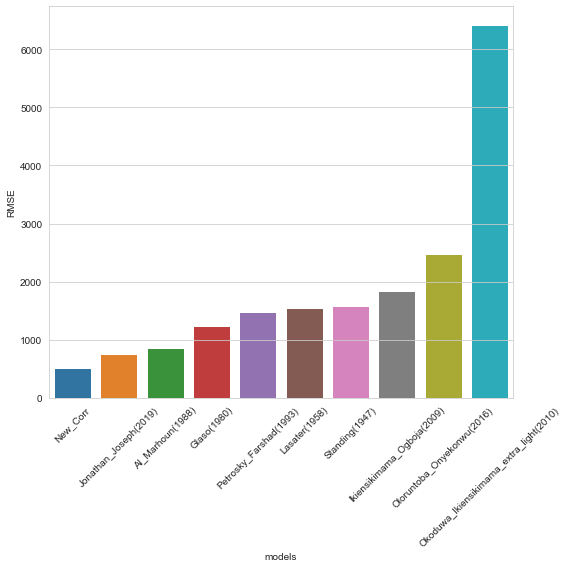

In [140]:
dd = all_data.sort_values(ascending=True, by='MARE').head(10)
dd = dd.reset_index()
dd.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(8,8))
sns.set_style('darkgrid')
sns.barplot(x='models', y='RMSE', data=dd)
plt.xticks(rotation=45)
plt.tight_layout()

### Extra Light Train

In [141]:
extra_light_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil
299,3204.0,555.0,0.63,162.0,0.74,59.716216
131,3063.0,455.0,0.65,166.0,0.78,49.910256
294,3204.0,555.0,0.63,162.0,0.74,59.716216
51,1897.0,318.0,0.65,160.0,0.79,47.613924
271,2876.0,455.0,0.65,151.0,0.77,52.266234


In [142]:
model_train = extra_light_train.copy()
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_extra_light_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_extra_light,PB_Oloruntoba_Onyekonwu,PB_Prince
299,3204.0,555.0,0.63,162.0,0.74,59.716216,1249.047484,1237.236839,1735.789572,2318.016016,1287.987668,1040.062102,8623.586850,283.611363,2641.665673,3211.277222
131,3063.0,455.0,0.65,166.0,0.78,49.910256,1382.785552,1489.110469,1724.076567,2256.823578,1579.908636,1177.965309,9432.919824,398.132214,2418.019591,2874.057422
294,3204.0,555.0,0.63,162.0,0.74,59.716216,1249.047484,1237.236839,1735.789572,2318.016016,1287.987668,1040.062102,8623.586850,283.611363,2641.665673,3211.277222
51,1897.0,318.0,0.65,160.0,0.79,47.613924,1078.074436,1123.982823,1287.299778,1795.089098,1139.476380,1153.760626,9139.557772,336.771391,1903.536949,2622.566050
271,2876.0,455.0,0.65,151.0,0.77,52.266234,1249.739189,1331.418787,1607.194784,2098.494212,1374.995958,1071.799719,9071.180262,318.030256,2286.757313,2998.229822


In [143]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  1890.4660918721968

The percent mean absolute relative error is:  55.77438319157291

The percent mean relative error is:  55.77438319157291

_____________PB_Lasater__________

The rmse value is:  1870.4320777705964

The percent mean absolute relative error is:  54.52547522453281

The percent mean relative error is:  54.393068982085566

_____________PB_Glaso__________

The rmse value is:  1437.3773480886389

The percent mean absolute relative error is:  41.994667087130225

The percent mean relative error is:  41.08929462620449

_____________PB_Al-Marhoun__________

The rmse value is:  977.5798165592132

The percent mean absolute relative error is:  27.084636685941962

The percent mean relative error is:  22.809108547021026

_____________PB_Petrosky__________

The rmse value is:  1805.753773786455

The percent mean absolute relative error is:  52.52814233491458

The percent mean relative error is:  52.05984376926154

_____________P

In [144]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_extra_light(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

extra_light = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
extra_light.sort_values(ascending=True, by='MARE')

,RMSE,MARE,MRE
New_Corr,375.968988,9.663590,0.115179
Jonathan_Joseph(2019),792.111622,20.672631,14.031116
Al_Marhoun(1988),977.579817,27.084637,22.809109
Glaso(1980),1437.377348,41.994667,41.089295
Petrosky_Farshad(1993),1805.753774,52.528142,52.059844
Lasater(1958),1870.432078,54.525475,54.393069
Standing(1947),1890.466092,55.774383,55.774383
Ikiensikimama_Ogboja(2009),2207.682773,65.240443,65.240443
Oloruntoba_Onyekonwu(2016),2929.875226,88.985809,88.985809
Okoduwa_Ikiensikimama_extra_light(2010),5674.431672,177.870301,-176.832322


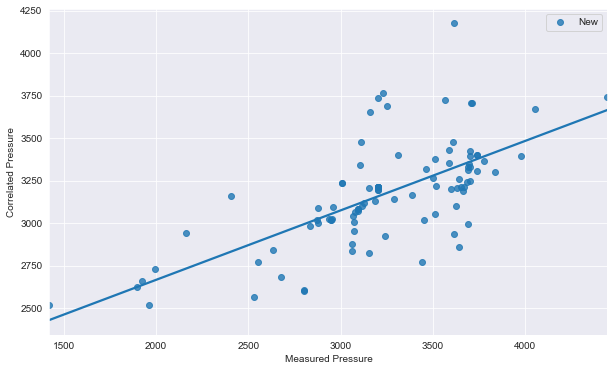

In [145]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('darkgrid',{'axes.axisbelow':False})

#sns.regplot(x='PB', y = 'PB_Standing', data=model_train, ci=None, ax=ax, label='Standing')
#sns.regplot(x='PB', y = 'PB', data=model_train, ci=None, ax=ax, label='Actual')
#sns.regplot(x='PB', y = 'PB_Glaso', data=model_train, ci=None, ax=ax, label='Glaso')
sns.regplot(x='PB', y='PB_Prince', data=model_train, fit_reg=True, ci=None, ax=ax, label='New')
#sns.regplot(x='PB', y = 'PB_Al-Marhoun', data=model_train, ci=None, ax=ax, label='Al-Marhoun')
#sns.regplot(x='PB', y = 'PB_Petrosky', data=model_train, ci=None, ax=ax, label='Petrosky_Farshad')
#sns.regplot(x='PB', y = 'PB_Jonathan', data=model_train, ci=None, ax=ax, label='Jonathan_Joseph')
#sns.regplot(x='PB', y='PB_Oloruntoba_Onyekonwu', data=model_train, fit_reg=True, ci=None, ax=ax, label='Oloruntoba_Onyekonwu')
#sns.regplot(x='PB', y = 'PB_Lasater', data=model_train, ci=None, ax=ax, label='Lasater')
#sns.regplot(x='PB', y = 'PB_Ikiensikimama_Ogboja', data=model_train, ci=None, ax=ax, label='Ikiensikimama_Ogboja')
#sns.regplot(x='PB', y='PB_Okoduwa_Ikien_extra_light', data=model_train, fit_reg=True, ci=None, ax=ax, label='Okoduwa_Ikien')
ax.set(ylabel='Correlated Pressure', xlabel='Measured Pressure')
ax.legend()
plt.show()

## Extra_Light Test

In [146]:
model_train = extra_light_test.copy()
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_extra_light_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_extra_light,PB_Oloruntoba_Onyekonwu,PB_Prince
275,2940.0,479.0,0.65,153.0,0.77,52.266234,1310.911966,1404.959028,1689.993414,2186.523268,1464.268694,1082.292702,9151.208610,334.289763,2381.703821,3025.056425
358,3684.0,777.0,0.65,164.0,0.72,65.027778,1389.647352,1273.914188,2086.412379,2561.912675,1370.884417,1005.029937,6810.602337,266.483962,3022.484399,3532.326568
123,3566.0,651.0,0.65,161.0,0.72,65.027778,1188.714609,1065.018455,1773.868630,2243.060062,1094.669389,980.212985,6314.795373,231.049149,2649.062567,3395.689925
441,3374.0,500.0,0.65,142.0,0.78,49.910256,1422.758873,1569.798289,1823.514550,2292.261065,1668.306542,1062.964199,9238.062429,359.158934,2466.493883,3099.179993
279,3078.0,524.0,0.65,158.0,0.77,52.266234,1429.477636,1546.392820,1845.951113,2356.782033,1632.061002,1113.281723,9303.814786,368.338166,2564.248977,3063.275079


In [147]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  1956.9051507311344

The percent mean absolute relative error is:  57.59418839140666

The percent mean relative error is:  57.59418839140666

_____________PB_Lasater__________

The rmse value is:  1938.9671604134794

The percent mean absolute relative error is:  56.608870026461645

The percent mean relative error is:  56.54899899118483

_____________PB_Glaso__________

The rmse value is:  1498.4025781998268

The percent mean absolute relative error is:  43.92881079330793

The percent mean relative error is:  43.539611622019294

_____________PB_Al-Marhoun__________

The rmse value is:  985.7116745394854

The percent mean absolute relative error is:  26.648194949699977

The percent mean relative error is:  26.273262105924307

_____________PB_Petrosky__________

The rmse value is:  1896.804825666294

The percent mean absolute relative error is:  55.29387447893512

The percent mean relative error is:  54.88863196376387

_____________P

In [148]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_extra_light(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

extra_light_test = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
extra_light_test.sort_values(ascending=True, by='MARE')

,RMSE,MARE,MRE
New_Corr,409.981557,10.031228,2.758642
Jonathan_Joseph(2019),740.864454,18.815356,17.876517
Al_Marhoun(1988),985.711675,26.648195,26.273262
Glaso(1980),1498.402578,43.928811,43.539612
Petrosky_Farshad(1993),1896.804826,55.293874,54.888632
Lasater(1958),1938.967160,56.608870,56.548999
Standing(1947),1956.905151,57.594188,57.594188
Ikiensikimama_Ogboja(2009),2246.733009,65.943049,65.943049
Oloruntoba_Onyekonwu(2016),2963.764028,89.336915,89.336915
Okoduwa_Ikiensikimama_extra_light(2010),5425.308231,163.912096,-161.097018


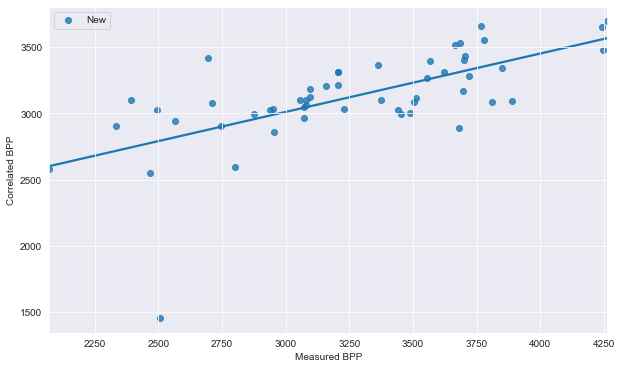

In [149]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('darkgrid',{'axes.axisbelow':False})

#sns.regplot(x='PB', y = 'PB_Standing', data=model_train, ci=None, ax=ax, label='Standing')
#sns.regplot(x='PB', y = 'PB', data=model_train, ci=None, ax=ax, label='Actual')
#sns.regplot(x='PB', y = 'PB_Glaso', data=model_train, ci=None, ax=ax, label='Glaso')
sns.regplot(x='PB', y='PB_Prince', data=model_train, fit_reg=True, ci=None, ax=ax, label='New')
#sns.regplot(x='PB', y = 'PB_Al-Marhoun', data=model_train, ci=None, ax=ax, label='Al-Marhoun')
#sns.regplot(x='PB', y = 'PB_Petrosky', data=model_train, ci=None, ax=ax, label='Petrosky_Farshad')
#sns.regplot(x='PB', y = 'PB_Jonathan', data=model_train, ci=None, ax=ax, label='Jonathan_Joseph')
#sns.regplot(x='PB', y='PB_Oloruntoba_Onyekonwu', data=model_train, fit_reg=True, ci=None, ax=ax, label='Oloruntoba_Onyekonwu')
#sns.regplot(x='PB', y = 'PB_Lasater', data=model_train, ci=None, ax=ax, label='Lasater')
#sns.regplot(x='PB', y = 'PB_Ikiensikimama_Ogboja', data=model_train, ci=None, ax=ax, label='Ikiensikimama_Ogboja')
#sns.regplot(x='PB', y='PB_Okoduwa_Ikien_extra_light', data=model_train, fit_reg=True, ci=None, ax=ax, label='Okoduwa_Ikien')
ax.set(ylabel='Correlated BPP', xlabel='Measured BPP')
ax.legend()
plt.show()

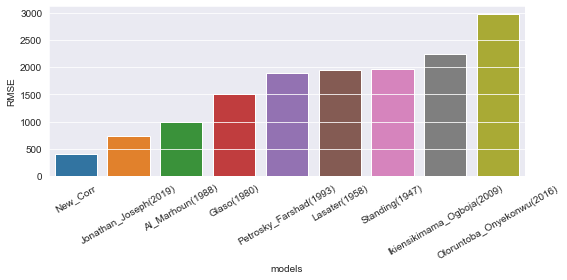

In [150]:
dd = extra_light_test.sort_values(ascending=True, by='MARE').head(9)
dd = dd.reset_index()
dd.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('darkgrid')
sns.barplot(x='models', y='RMSE', data=dd)
plt.xticks(rotation=30)
plt.tight_layout()

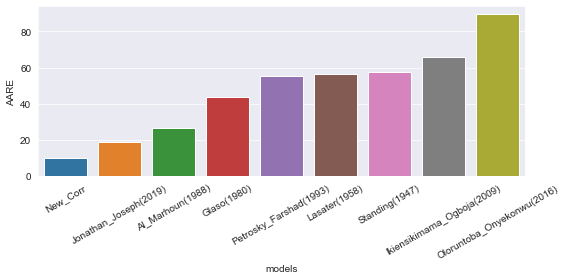

In [151]:
dd = extra_light_test.sort_values(ascending=True, by='MARE').head(9)
dd = dd.reset_index()
dd.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('darkgrid')
sns.barplot(x='models', y='AARE', data=dd)
plt.xticks(rotation=30)
plt.tight_layout()

**_Voila! It performed better than others on the extra light crude test set_**

### Light Crude

In [152]:
model_train = light_crude_train.copy()
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_light_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_light,PB_Oloruntoba_Onyekonwu,PB_Prince
478,1891.0,211.0,0.65,147.0,0.86,33.034884,1136.882776,1122.945928,1306.204610,1699.816494,1273.853257,1305.533855,9266.874234,9266.874234,1715.147425,2219.129607
83,3284.0,378.0,0.65,144.0,0.84,36.952381,1648.717673,1785.814255,1973.084876,2379.507312,2059.186610,1269.980800,9566.258061,9566.258061,2419.645768,2667.604532
431,2500.0,321.0,0.64,162.0,0.81,43.191358,1259.419651,1334.636125,1480.500748,2021.323386,1457.847074,1250.718569,9583.163833,9583.163833,2097.428101,2566.816254
4,3491.0,474.0,0.65,161.0,0.82,41.060976,1834.452274,2034.783985,2197.349246,2690.674415,2289.662103,1316.829619,9805.454604,9805.454604,2765.556195,2797.087066
199,2628.0,308.0,0.65,135.0,0.85,34.970588,1441.985986,1519.958043,1719.907888,2091.198028,1766.466933,1231.215887,9371.302334,9371.302334,2117.360516,2550.253981


In [153]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  1283.0082445298192

The percent mean absolute relative error is:  44.006343270538025

The percent mean relative error is:  44.006343270538025

_____________PB_Lasater__________

The rmse value is:  1195.1656260554325

The percent mean absolute relative error is:  41.031935857184465

The percent mean relative error is:  41.03188775724085

_____________PB_Glaso__________

The rmse value is:  1041.7063837463354

The percent mean absolute relative error is:  34.55811084748172

The percent mean relative error is:  34.064167739970465

_____________PB_Al-Marhoun__________

The rmse value is:  688.2351681345564

The percent mean absolute relative error is:  19.306435798641594

The percent mean relative error is:  16.212791029677184

_____________PB_Petrosky__________

The rmse value is:  1050.1812654232833

The percent mean absolute relative error is:  34.36958979749858

The percent mean relative error is:  33.645988002322966

__________

In [154]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_light(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

light_train = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
light_train.sort_values(ascending=True, by='RMSE')

,RMSE,MARE,MRE
New_Corr,544.164714,18.302459,-0.276626
Jonathan_Joseph(2019),660.087568,18.234955,14.612049
Al_Marhoun(1988),688.235168,19.306436,16.212791
Glaso(1980),1041.706384,34.558111,34.064168
Petrosky_Farshad(1993),1050.181265,34.369590,33.645988
Lasater(1958),1195.165626,41.031936,41.031888
Standing(1947),1283.008245,44.006343,44.006343
Ikiensikimama_Ogboja(2009),1501.369823,48.810800,48.648090
Okoduwa_Ikiensikimama_light(2010),6887.936622,279.984374,-279.984374
Oloruntoba_Onyekonwu(2016),6887.936622,279.984374,-279.984374


### Light Crude Test

In [155]:
model_train = light_crude_test.copy()
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_light_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_light,PB_Oloruntoba_Onyekonwu,PB_Prince
2,3415.0,401.0,0.65,159.0,0.83,38.981928,1686.028400,1834.521788,1999.910449,2469.520506,2090.184245,1304.870257,9733.847602,9733.847602,2520.724457,2656.396566
385,1720.0,238.0,0.65,151.0,0.86,33.034884,1269.867018,1272.772547,1474.081907,1868.878046,1477.568064,1318.449027,9420.622855,9420.622855,1884.358382,2268.874552
176,2951.0,366.0,0.65,155.0,0.82,41.060976,1456.459274,1574.751552,1731.104557,2207.831579,1759.121903,1238.960935,9553.544557,9553.544557,2273.168063,2649.916372
8,3616.0,466.0,0.65,163.0,0.81,43.191358,1706.534955,1889.742506,2056.010981,2568.474091,2099.783358,1267.630249,9751.022817,9751.022817,2662.322768,2808.120960
333,2714.0,299.0,0.65,145.0,0.87,31.143678,1606.874239,1648.261342,1928.196191,2251.852270,1976.137906,1338.511416,9563.865918,9563.865918,2267.438277,2403.290015


In [156]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  1245.485479616432

The percent mean absolute relative error is:  41.218169277844325

The percent mean relative error is:  41.218169277844325

_____________PB_Lasater__________

The rmse value is:  1162.5366190360523

The percent mean absolute relative error is:  38.43882747187254

The percent mean relative error is:  38.43882747187254

_____________PB_Glaso__________

The rmse value is:  994.8894271003355

The percent mean absolute relative error is:  30.428884362270967

The percent mean relative error is:  30.428884362270967

_____________PB_Al-Marhoun__________

The rmse value is:  620.1486722473194

The percent mean absolute relative error is:  16.116466281853995

The percent mean relative error is:  11.617427490025145

_____________PB_Petrosky__________

The rmse value is:  957.8475587537655

The percent mean absolute relative error is:  28.839627981995356

The percent mean relative error is:  28.839627981995356

____________

In [157]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_light(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

light_test = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
light_test.sort_values(ascending=True, by='RMSE')

,RMSE,MARE,MRE
New_Corr,565.596423,19.172247,-1.858758
Jonathan_Joseph(2019),590.681774,15.214360,10.081403
Al_Marhoun(1988),620.148672,16.116466,11.617427
Petrosky_Farshad(1993),957.847559,28.839628,28.839628
Glaso(1980),994.889427,30.428884,30.428884
Lasater(1958),1162.536619,38.438827,38.438827
Standing(1947),1245.485480,41.218169,41.218169
Ikiensikimama_Ogboja(2009),1485.034990,47.727832,47.727832
Okoduwa_Ikiensikimama_light(2010),7104.431721,295.914238,-295.914238
Oloruntoba_Onyekonwu(2016),7104.431721,295.914238,-295.914238


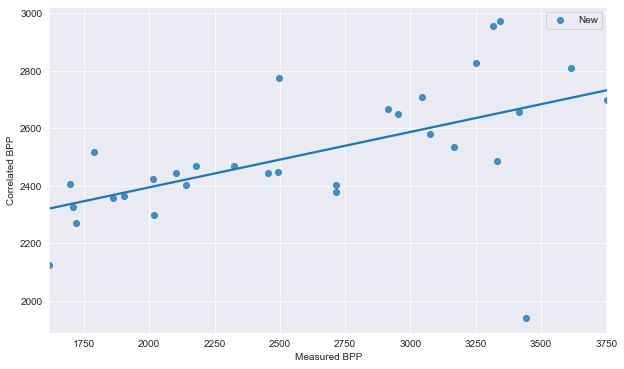

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('darkgrid',{'axes.axisbelow':False})

#sns.regplot(x='PB', y = 'PB_Standing', data=model_train, ci=None, ax=ax, label='Standing')
#sns.regplot(x='PB', y = 'PB', data=model_train, ci=None, ax=ax, label='Actual')
#sns.regplot(x='PB', y = 'PB_Glaso', data=model_train, ci=None, ax=ax, label='Glaso')
sns.regplot(x='PB', y='PB_Prince', data=model_train, fit_reg=True, ci=None, ax=ax, label='New')
#sns.regplot(x='PB', y = 'PB_Al-Marhoun', data=model_train, ci=None, ax=ax, label='Al-Marhoun')
#sns.regplot(x='PB', y = 'PB_Petrosky', data=model_train, ci=None, ax=ax, label='Petrosky_Farshad')
#sns.regplot(x='PB', y = 'PB_Jonathan', data=model_train, ci=None, ax=ax, label='Jonathan_Joseph')
#sns.regplot(x='PB', y='PB_Oloruntoba_Onyekonwu', data=model_train, fit_reg=True, ci=None, ax=ax, label='Oloruntoba_Onyekonwu')
#sns.regplot(x='PB', y = 'PB_Lasater', data=model_train, ci=None, ax=ax, label='Lasater')
#sns.regplot(x='PB', y = 'PB_Ikiensikimama_Ogboja', data=model_train, ci=None, ax=ax, label='Ikiensikimama_Ogboja')
#sns.regplot(x='PB', y='PB_Okoduwa_Ikien_extra_light', data=model_train, fit_reg=True, ci=None, ax=ax, label='Okoduwa_Ikien')
ax.set(ylabel='Correlated BPP', xlabel='Measured BPP')
ax.legend()
plt.show()

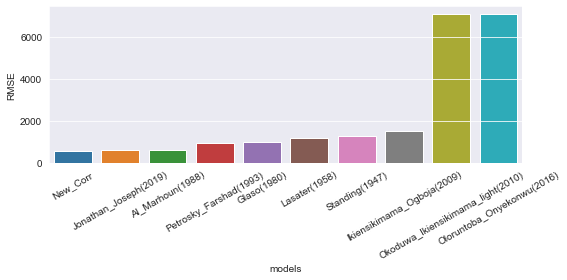

In [159]:
dd = light_test.sort_values(ascending=True, by='RMSE').head(10)
dd = dd.reset_index()
dd.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('darkgrid')
sns.barplot(x='models', y='RMSE', data=dd)
plt.xticks(rotation=30)
plt.tight_layout()

#### The new correlation developed reduced the error term more than the existing correlations did

### Medium Crude 

In [160]:
model_train = medium_crude_train.copy()
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_medium_Corr(model_train)
model_train = Okoduwa_Ikien_blend_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_medium,PB_Okoduwa_Ikien_blend,PB_Oloruntoba_Onyekonwu,PB_Prince
245,659.0,74.0,0.59,141.0,0.91,23.994505,650.766806,550.748015,728.650848,1136.110190,442.365083,1311.029140,9058.013478,536.050282,46.551941,1161.905248,1629.229806
474,1816.0,197.0,0.65,139.0,0.90,25.722222,1307.189603,1225.090480,1614.339158,1834.454160,1495.852790,1355.520113,9309.753359,1307.232973,96.548681,1859.212212,2088.945114
62,3015.0,245.0,0.65,132.0,0.88,29.295455,1394.518776,1386.582347,1690.138026,1966.847708,1670.194920,1261.423833,9310.208438,1399.289719,104.312856,1981.432784,2319.711990
60,2917.0,294.0,0.65,127.0,0.89,27.488764,1696.555244,1707.232772,2119.414768,2295.791506,2100.041892,1277.416218,9402.004251,1820.896785,118.473102,2315.221938,2424.015217
373,1257.0,166.0,0.65,134.0,0.88,29.295455,1006.781746,948.692592,1168.373930,1495.627637,1058.820521,1240.098919,9002.129005,940.890213,73.939023,1507.714413,2088.433869


In [161]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  896.4926670138188

The percent mean absolute relative error is:  27.363330208834824

The percent mean relative error is:  26.738932862273412

_____________PB_Lasater__________

The rmse value is:  914.6321256304659

The percent mean absolute relative error is:  30.601093416642563

The percent mean relative error is:  29.726911404399708

_____________PB_Glaso__________

The rmse value is:  740.5321536581262

The percent mean absolute relative error is:  18.617819163304155

The percent mean relative error is:  9.841045801708331

_____________PB_Al-Marhoun__________

The rmse value is:  694.5270174992028

The percent mean absolute relative error is:  21.657715376673032

The percent mean relative error is:  -5.4305658299596

_____________PB_Petrosky__________

The rmse value is:  789.0417860133

The percent mean absolute relative error is:  22.56107823244791

The percent mean relative error is:  16.028480349259667

_____________PB_Jo

In [162]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_blend(2010)','Okoduwa_Ikiensikimama_medium(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

medium_train = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
medium_train.sort_values(ascending=True, by='RMSE')

,RMSE,MARE,MRE
New_Corr,582.491811,25.325306,-11.986798
Al_Marhoun(1988),694.527017,21.657715,-5.430566
Jonathan_Joseph(2019),706.979126,22.872682,-7.029802
Glaso(1980),740.532154,18.617819,9.841046
Petrosky_Farshad(1993),789.041786,22.561078,16.028480
Okoduwa_Ikiensikimama_medium(2010),883.211683,28.012344,26.450665
Standing(1947),896.492667,27.363330,26.738933
Lasater(1958),914.632126,30.601093,29.726911
Ikiensikimama_Ogboja(2009),1106.965492,37.529046,28.588004
Oloruntoba_Onyekonwu(2016),2187.064380,94.252715,94.252715


### Medium Crude Test

In [163]:
model_train = medium_crude_test.copy()
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_medium_Corr(model_train)
model_train = Okoduwa_Ikien_blend_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_medium,PB_Okoduwa_Ikien_blend,PB_Oloruntoba_Onyekonwu,PB_Prince
33,2853.0,472.0,0.59,150.0,0.90,25.722222,3026.687049,3096.169025,3715.763993,4210.479273,3856.035470,1504.778817,10943.342173,3287.408353,295.530290,4264.843885,2615.111047
376,1407.0,116.0,0.65,136.0,0.88,29.295455,744.395060,673.899971,812.918764,1162.672617,604.832318,1210.918283,8609.125694,652.892222,53.949798,1172.729105,1895.339288
368,1127.0,123.0,0.65,131.0,0.90,25.722222,860.975148,762.645137,1008.314917,1286.715693,790.985312,1248.497298,8757.545601,808.582841,55.702500,1304.743310,1886.937522
530,2169.0,282.0,0.61,146.0,0.91,23.994505,1992.342991,1939.756312,2551.890578,2808.547003,2488.088448,1461.770606,10302.919137,2075.012213,167.107145,2863.924799,2252.742382
371,1379.0,166.0,0.65,134.0,0.89,27.488764,1061.880279,987.828824,1260.449876,1549.710834,1135.993478,1261.826834,9055.835831,1016.739720,75.473675,1565.029001,2056.203810


In [164]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  1054.8020620110815

The percent mean absolute relative error is:  26.89975730712163

The percent mean relative error is:  24.685984896585705

_____________PB_Lasater__________

The rmse value is:  1084.0243833323439

The percent mean absolute relative error is:  30.79538940108522

The percent mean relative error is:  27.69601681222422

_____________PB_Glaso__________

The rmse value is:  1060.6774510443306

The percent mean absolute relative error is:  23.496068203611756

The percent mean relative error is:  9.077444014523648

_____________PB_Al-Marhoun__________

The rmse value is:  1029.7136551485755

The percent mean absolute relative error is:  27.006053201231513

The percent mean relative error is:  -8.991135425721142

_____________PB_Petrosky__________

The rmse value is:  1169.7520228548929

The percent mean absolute relative error is:  30.979161045319632

The percent mean relative error is:  15.519932856500883

__________

In [165]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_blend(2010)','Okoduwa_Ikiensikimama_medium(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

medium_test = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
medium_test.sort_values(ascending=True, by='RMSE')

,RMSE,MARE,MRE
New_Corr,792.393047,34.287258,-18.687230
Al_Marhoun(1988),1029.713655,27.006053,-8.991135
Jonathan_Joseph(2019),1044.496533,28.091706,-10.392335
Standing(1947),1054.802062,26.899757,24.685985
Glaso(1980),1060.677451,23.496068,9.077444
Lasater(1958),1084.024383,30.795389,27.696017
Okoduwa_Ikiensikimama_medium(2010),1106.190145,30.244796,24.707934
Ikiensikimama_Ogboja(2009),1122.197664,30.332173,26.238431
Petrosky_Farshad(1993),1169.752023,30.979161,15.519933
Oloruntoba_Onyekonwu(2016),2126.783118,93.983035,93.983035


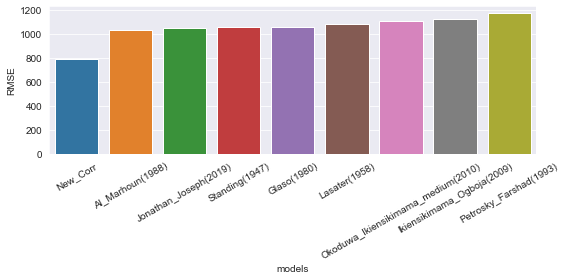

In [166]:
dd = medium_test.sort_values(ascending=True, by='RMSE').head(9)
dd = dd.reset_index()
dd.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('darkgrid')
sns.barplot(x='models', y='RMSE', data=dd)
plt.xticks(rotation=30)
plt.tight_layout()

__*The new model performed better!*__

### Heavy ex crude oil

### Because of the very few instances for heavy crude, we combine the train and the test set instances together

In [167]:

model_train = pd.concat((heavy_ex_crude_test, heavy_ex_crude_train))
model_train = Standing_Corr(model_train)
model_train = Lasater_Corr(model_train)
model_train = Glaso_Corr(model_train)
model_train = Al_Marhoun_Corr(model_train)
model_train = Petrosky_Farshad_Corr(model_train)
model_train = Jonathan_Joseph_Corr(model_train)
model_train = Ikiensikimama_Ogboja_Corr(model_train)
model_train = Okoduwa_Ikien_heavy_Corr(model_train)
model_train = Oloruntoba_Onyekonwu_Corr(model_train)
model_train = Prince_Corr(model_train)
model_train.head()

,PB,RSI,SG_Gas,F_Temp,SG_Oil,API_Oil,PB_Standing,PB_Lasater,PB_Glaso,PB_Al-Marhoun,PB_Petrosky,PB_Jonathan,PB_Ikiensikimama_Ogboja,PB_Okoduwa_Ikien_heavy,PB_Oloruntoba_Onyekonwu,PB_Prince
30,2824.0,420.0,0.65,142.0,0.93,20.650538,2883.484977,2745.171346,3832.738389,3517.706499,3455.803925,1613.582245,9837.708268,2527.628932,3653.245898,2388.540787
238,3134.0,14.0,0.65,138.0,0.95,17.447368,162.506848,145.812523,140.866812,327.495853,-683.014831,1309.463528,4562.063496,123.368332,352.935027,964.865622
244,3195.0,97.0,0.65,140.0,0.93,20.650538,832.825946,682.018774,1052.844326,1228.029343,684.239133,1441.924885,8731.493206,653.071066,1278.195936,1646.185994


In [168]:
RMSE, MARE, MRE = performance(model_train)


_____________PB_Standing__________

The rmse value is:  2191.8923542041766

The percent mean absolute relative error is:  56.951527753452524

The percent mean relative error is:  55.54725538819118

_____________PB_Lasater__________

The rmse value is:  2254.665754834375

The percent mean absolute relative error is:  58.93078039326654

The percent mean relative error is:  58.93078039326654

_____________PB_Glaso__________

The rmse value is:  2203.423877269278

The percent mean absolute relative error is:  66.09084362538225

The percent mean relative error is:  42.2773783465193

_____________PB_Al-Marhoun__________

The rmse value is:  2018.800617513134

The percent mean absolute relative error is:  58.55964419686125

The percent mean relative error is:  42.18319238714013

_____________PB_Petrosky__________

The rmse value is:  2662.8742960814657

The percent mean absolute relative error is:  74.25014454145253

The percent mean relative error is:  59.33503772711629

_____________PB_Jon

In [169]:
index = ['Standing(1947)', 'Lasater(1958)', 'Glaso(1980)', 'Al_Marhoun(1988)', 'Petrosky_Farshad(1993)', 
        'Ikiensikimama_Ogboja(2009)', 'Okoduwa_Ikiensikimama_heavy(2010)', 
         'Oloruntoba_Onyekonwu(2016)', 'Jonathan_Joseph(2019)', 'New_Corr']

heavy_test = pd.DataFrame({'RMSE':RMSE, 'MARE':MARE, 'MRE':MRE}, index=index)
heavy_test.sort_values(ascending=True, by='RMSE')

,RMSE,MARE,MRE
New_Corr,1559.229885,44.369697,44.369697
Ikiensikimama_Ogboja(2009),1619.394624,51.982883,51.982883
Jonathan_Joseph(2019),2007.993108,59.365537,39.789383
Al_Marhoun(1988),2018.800618,58.559644,42.183192
Standing(1947),2191.892354,56.951528,55.547255
Glaso(1980),2203.423877,66.090844,42.277378
Lasater(1958),2254.665755,58.930780,58.930780
Oloruntoba_Onyekonwu(2016),2281.311140,62.039289,62.039289
Petrosky_Farshad(1993),2662.874296,74.250145,59.335038
Okoduwa_Ikiensikimama_heavy(2010),5224.437004,155.737915,-155.737915


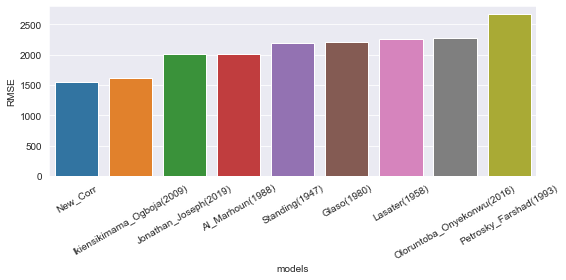

In [170]:
dd = heavy_test.sort_values(ascending=True, by='RMSE').head(9)
dd = dd.reset_index()
dd.rename(columns={'index':'models', 'RMSE':'RMSE', 'MARE':'AARE', 'MRE':'ARE'}, inplace=True)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('darkgrid')
sns.barplot(x='models', y='RMSE', data=dd)
plt.xticks(rotation=30)
plt.tight_layout()

### We find that the new correlation developed better reduced the bubble point pressure estimation error on all Oil API gravity classes compared to other correlations.

### Contribution to the Industry:  
1. This work establishes practical application of machine learning in the industry. 
2. It helps save time of reservoir engineers and the cost involved in estimating the Bubble point pressure through flash explansion of the fluid samples in the laboratory.
3. A reduction in the error term ultimately culminates to a reduction in the risk of estimation of oil reserves.

### Future Work:  
1. The same methodology used in this work can be used to develop reservoir engineering equations.
2. This work utilized Niger Delta PVT data, it may not perform as best for PVT from other regions. Hence, to make up for generalization, PVT data across the globe can be run using the same methodology.